# Juntar Datos Calidad Aire y Meteo

In [1]:
suppressMessages(library(saqgetr))
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(lubridate))

In [2]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=10,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [3]:
setwd("~/Repositories/AirQualityCOVID/")

source("src/Curation/general.R")

In [4]:
sitesAQ <- read.csv("data/Curation/AirQuality/checked_sitesAQ.csv",
                    stringsAsFactor=F)

sitesMto <- read.csv("data/Curation/AEMET/checked_sites_AEMET.csv",
                     stringsAsFactor=F)

rh.ERA5.Land <- read.csv("data/Curation/ERA5-Land/Values/rh_daily_2010_2020_final_stations.csv",
                         stringsAsFactor=F)%>% data.as.datetime("dates", "ymd")
ssrd.ERA5.Land <- read.csv("data/Curation/ERA5-Land/Values/ssrd_daily_2010_2020_final_stations.csv",
                           stringsAsFactor=F)%>% data.as.datetime("dates", "ymd")

In [5]:
start_dt <- ymd_hms("2013-01-01 00:00:00")
end_dt <- ymd_hms("2020-12-31 00:00:00")

In [6]:
site.lv <- levels(as.factor(sitesAQ$site))[1:3]
for (st in site.lv) {
    pll <- sitesAQ[sitesAQ$site == st, "Pollutant"]
    dataAQ <- get.AQdata(st, pll, start_dt=start_dt, end_dt=end_dt,
                       data.by.file=TRUE, fileName="data/Curation/AirQuality/Values/")
    
    dataAQ <- group.by.date(dataFrame=dataAQ,
                            valueList = list(value=dataAQ$value),
                            byList = list(date=dataAQ$date,
                                          site=dataAQ$site,
                                          variable=dataAQ$variable),
                            unit="day", FUN="mean"
                           ) %>% data.as.datetime("date", "ymd") %>%
                            pivot.long.table(valueCl = "value", variableCl="variable")
    
    nameMto <- paste("data/Curation/AEMET/Values/",
                    sitesMto[sitesMto$siteAQ == st, "indicativo"],
                    ".csv", sep="")
    
    dataMto <- read.csv(nameMto, stringsAsFactor=F) %>%
                data.as.datetime("fecha", "ymd") %>%
                select("fecha", "indicativo",
                       "tmed", "prec", "tmin", "tmax", "dir",
                       "velmedia", "racha", "presMax", "presMin"
                      )
    
    data.st <- merge(dataAQ, dataMto,
                  by.x="date", by.y="fecha",
                  all.x = T
                 )
    data.st <- merge(data.st, rh.ERA5.Land[, c("dates", st)],
                     by.x="date", by.y="dates",
                     all.x = T
                    )
    names(data.st)[ncol(data.st)] <- "RH"
    
    data.st <- merge(data.st, ssrd.ERA5.Land[, c("dates", st)],
                     by.x="date", by.y="dates",
                     all.x = T
                    )
    names(data.st)[ncol(data.st)] <- "Solar.radiation"
    
    data.st <- cbind(data.st[, c("date", "site", "indicativo")],
                      data.st[, names(data.st)[-which(names(data.st) %in% c("date", "site", "indicativo"))]])
    
    #write.csv(data.st,
    #          paste("data/Curation/Values/",
    #                st, ".csv", sep=""),
    #          row.names=F)
    
}

In [7]:
a <- pivot.short.table(data.st, cols = names(data.st)[4:ncol(data.st)])

Warning message:
"Removed 739 rows containing missing values (geom_point)."


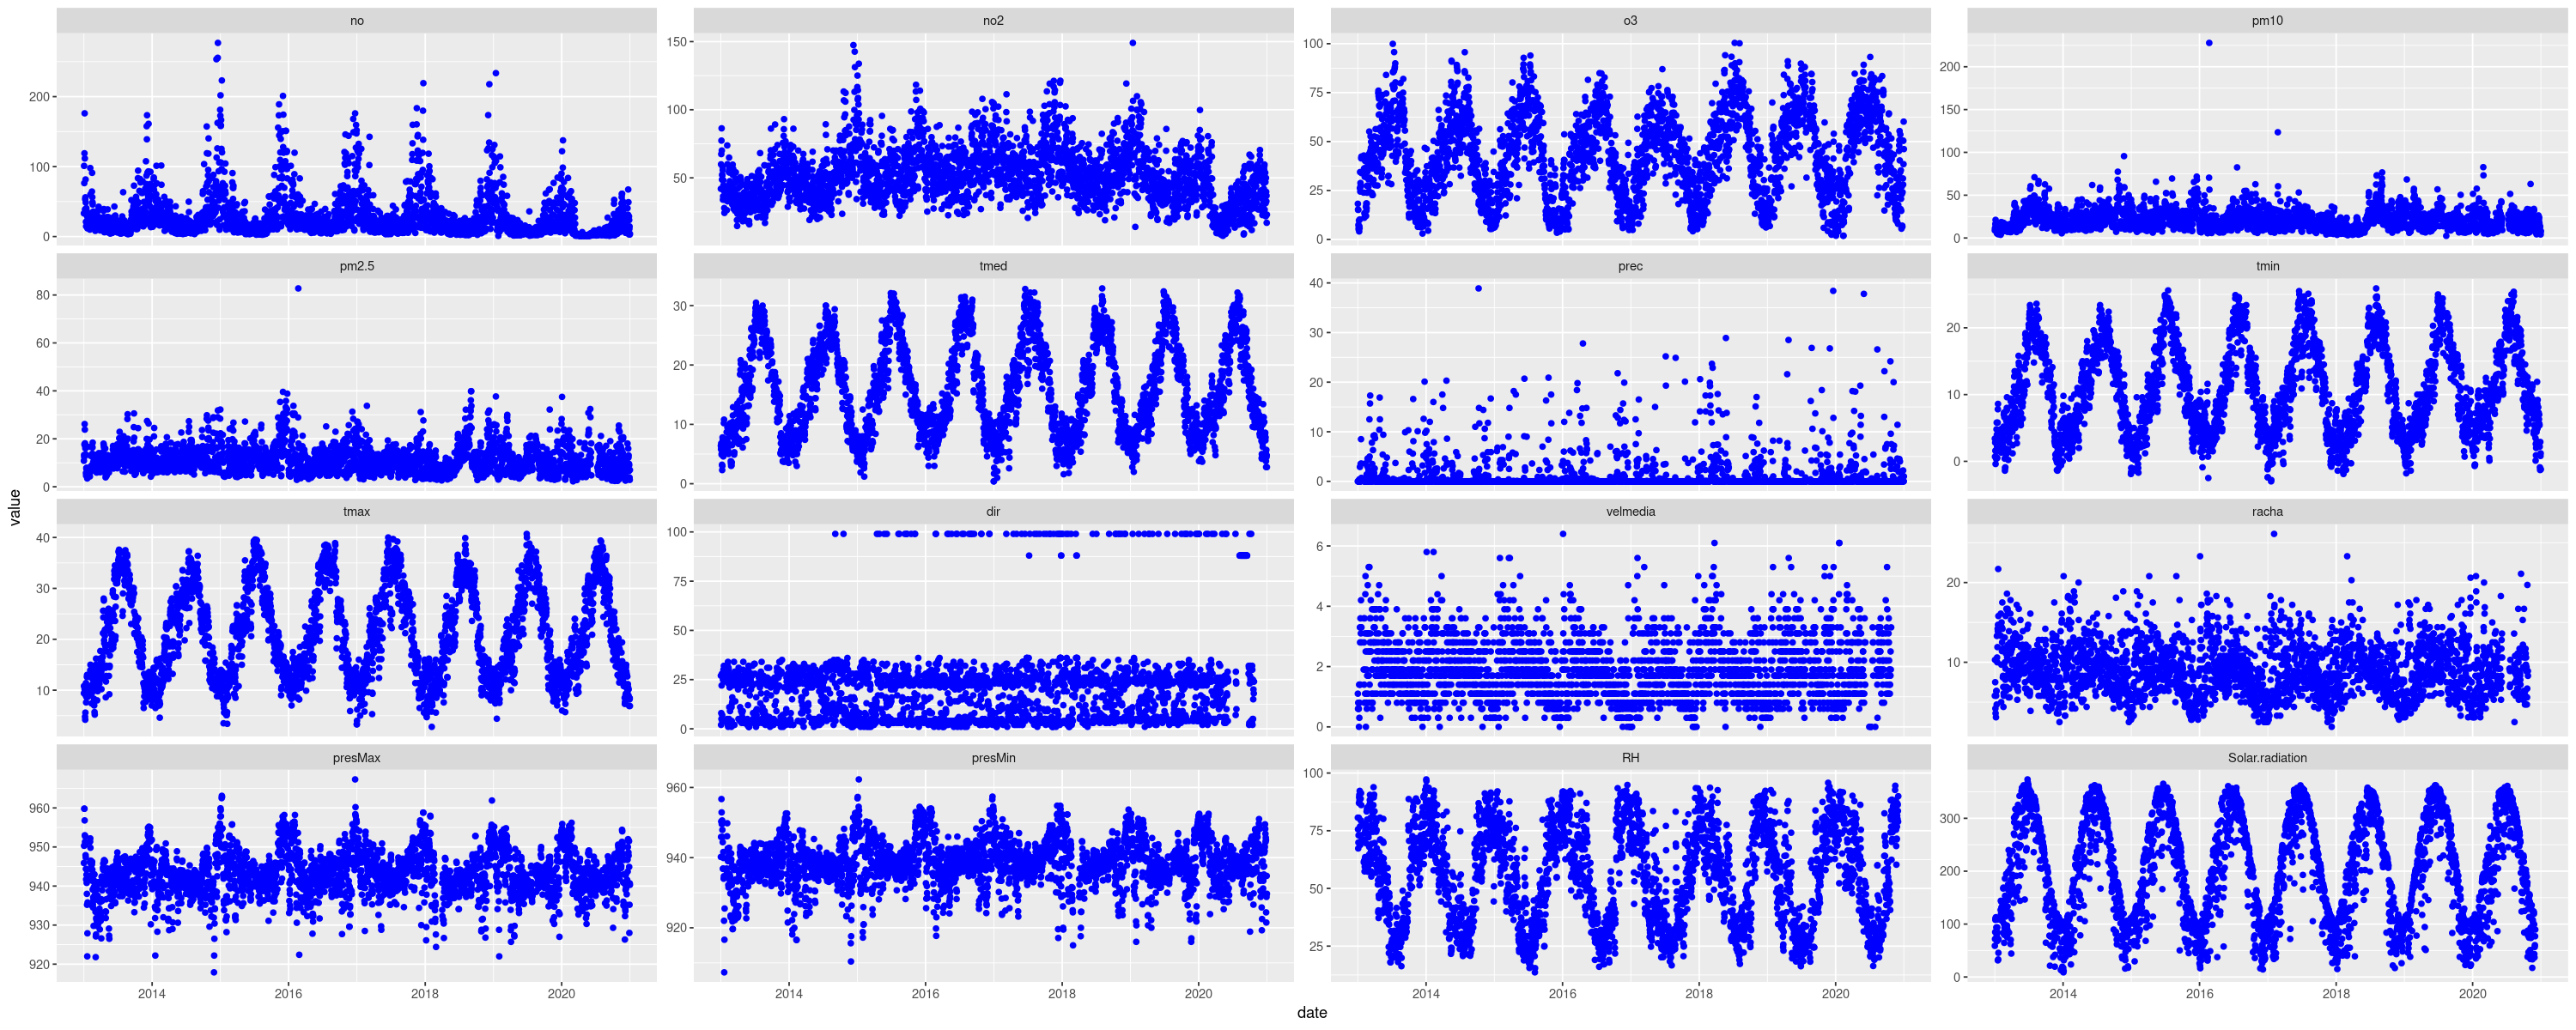

In [8]:
ggplot(data=a, aes(x=date)) +
    geom_point(aes(y=value), color="blue") +
    facet_wrap(~variable, scale="free_y", nrow = 4)

In [9]:
head(data.st)

,date,site,indicativo,no,no2,o3,pm10,pm2.5,tmed,prec,tmin,tmax,dir,velmedia,racha,presMax,presMin,RH,Solar.radiation
,<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2013-01-01,es0118a,3195,33.125,41.95833,18.208333,8.833333,10.83333,6.4,0,3.4,9.4,27,1.1,5.8,945.9,940.2,80.65828,58.83178
2,2013-01-02,es0118a,3195,101.000,59.91667,15.250000,11.125000,13.25000,5.8,0,0.7,10.8,2,0.6,10.3,950.3,945.9,75.60469,71.71485
3,2013-01-03,es0118a,3195,76.375,67.41667,15.083333,11.958333,12.41667,6.8,0,2.8,10.8,8,0.8,7.5,959.8,950.3,67.31548,84.82211
4,2013-01-04,es0118a,3195,119.000,77.33333,7.375000,16.250000,17.66667,6.2,0,1.6,10.8,5,0.6,4.2,959.8,956.7,69.89121,107.96104
5,2013-01-05,es0118a,3195,176.125,86.33333,5.208333,21.166667,26.16667,4.9,0,-0.4,10.2,22,0.6,3.6,956.8,952.9,73.00545,110.16858
6,2013-01-06,es0118a,3195,111.625,70.04167,6.041667,16.875000,23.83333,5.1,0,0.7,9.5,NA,0.6,NA,953.0,949.6,80.61580,111.74950


```R
pairs(norm1[, 4:ncol(norm1)])

library(caret)
 
preproc1 <- preProcess(data.all[,4:ncol(data.all)], method=c("center", "scale"))
 
norm1 <- predict(preproc1, data.all[,4:ncol(data.all)])
 
summary(norm1)
```